<a href="https://colab.research.google.com/github/filipe-rds/Projeto_Capacitacao_IoT_Ciclo_1/blob/main/Projeto_IoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📜 Projeto Final - Capacitação IoT (Ciclo 1)
# 🎓 Aluno: Filipe da Silva Rodrigues

##  🎲 Dados capturados do dispositivo conectado ao servidor

In [14]:
"""""
import argparse

# Construct the argument parser
ap = argparse.ArgumentParser()

# Add the arguments to the parser
ap.add_argument("-a", "--address", required=True,
   help="Server IP Address or URL")
ap.add_argument("-p", "--port", required=True,
   help="Server Port")
ap.add_argument("-d", "--deviceid", required=True,
   help="Device ID")

args = vars(ap.parse_args())


HOST = args['address']
PORT = int(args['port'])
device_id = args['deviceid']


Link do dispositivo IoT
https://wokwi.com/projects/381478883722503169

Link do dispositivo IoT emulado no Python
https://colab.research.google.com/github/filipe-rds/Projeto_Capacitacao_IoT_Ciclo_1/blob/main/device_simulator.ipynb


"""
import socket
import select

HOST = 'playback.laced.com.br'
PORT = 50000
device_id = '20222370009'

lista = []

# Criação de um socket
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Conecta-se ao host remoto e à porta
sock.connect((HOST, PORT))

print("Conectado")

# Envia uma solicitação ao host
sock.send("app\n".encode()[:-1])

# Obtém a resposta do host, no máximo, digamos, 1.024 bytes
response_data = sock.recv(1024)

sresponse = response_data.decode("utf-8")
print(sresponse)

if sresponse == "fail":
    sock.close()
    exit()

# Envia uma solicitação ao host
sock.send((device_id + "\n").encode()[:-1])

# Obtém a resposta do host, no máximo, digamos, 1.024 bytes
response_data = sock.recv(1024)

sresponse = response_data.decode("utf-8")
print(sresponse)

# Define um tempo limite para operações de soquete (120 segundos neste caso)
sock.settimeout(120)

while True:
    try:
        # Aguarda até que haja dados para ler ou o tempo limite seja atingido
        pronto, _, _ = select.select([sock], [], [], 120)

        if not pronto:
            print("Tempo limite atingido. Encerrando conexão.")
            break

        # Obtém a resposta do host, no máximo, digamos, 1.024 bytes
        response_data = sock.recv(1024).decode("utf-8")

        if response_data == "fail":
            print("O servidor retornou 'fail'. Encerrando conexão.")
            break

        print(f"Dado recebido: {response_data} ℃")
        lista.append(float(response_data))

    except socket.timeout:
        print("Tempo limite atingido. Encerrando conexão.")
        break

# Encerramento
sock.close()



Conectado
ok
ok
Dado recebido: 26.64 ℃
Dado recebido: 18.52 ℃
Dado recebido: 18.45 ℃
Dado recebido: 31.4 ℃
Dado recebido: 23.89 ℃
Dado recebido: 17.96 ℃
Dado recebido: 23.09 ℃
Dado recebido: 18.8 ℃
Dado recebido: 17.31 ℃
Dado recebido: 25.28 ℃
Dado recebido: 20.47 ℃
Dado recebido: 27.14 ℃
Dado recebido: 22.19 ℃
Dado recebido: 25.31 ℃
Dado recebido: 17.62 ℃
Dado recebido: 16.49 ℃
Dado recebido: 21.62 ℃
Dado recebido: 22.6 ℃
Dado recebido: 30.68 ℃
Dado recebido: 23.98 ℃
Dado recebido: 30.29 ℃
Dado recebido: 26.44 ℃
Dado recebido: 16.29 ℃
Dado recebido: 27.44 ℃
Dado recebido: 30.46 ℃
Dado recebido: 22.07 ℃
Dado recebido: 16.29 ℃
Dado recebido: 17.17 ℃
Dado recebido: 15.86 ℃
Dado recebido: 18.89 ℃
Dado recebido: 16.5 ℃
Dado recebido: 23.85 ℃
Dado recebido: 19.37 ℃
Dado recebido: 26.7 ℃
Dado recebido: 25.66 ℃
Dado recebido: 23.27 ℃
Dado recebido: 18.13 ℃
Dado recebido: 24.16 ℃
Dado recebido: 16.71 ℃
Dado recebido: 16.92 ℃
Dado recebido: 20.46 ℃
Dado recebido: 18.98 ℃
Dado recebido: 18.89 ℃


## 🤖 Gerando dataset dos registros

In [15]:
import pandas as pd
import numpy as np
i = 0

# Criando um dataset dos registros recebidos pelo dispositivo IoT
arquivo = open('registros.csv', 'w')
arquivo.write('Tempo;Temperatura;Estado\n')

for registro in lista:
    i+=1
    if registro > 0.0 and registro <= 20.0:
        arquivo.write(f'{i};{registro};Agradável\n')

    elif registro > 20.0 and registro <= 28.0:
        arquivo.write(f'{i};{registro};Aceitável\n')

    elif registro > 28.0 :
        arquivo.write(f'{i};{registro};Alarmante\n')

arquivo.close()

caminho = '/content/registros.csv'
df = pd.read_csv(caminho, sep=';')

print("Registros computados pelo sensor de temperatura:\n\n")
display(df)

lista = np.array(lista)
lista = np.mean(lista)
print(f'\nMédia da temperatura dos registros: {lista:.2f} ℃')

Registros computados pelo sensor de temperatura:




,Tempo,Temperatura,Estado
0,1,26.64,Aceitável
1,2,18.52,Agradável
2,3,18.45,Agradável
3,4,31.40,Alarmante
4,5,23.89,Aceitável
...,...,...,...
95,96,24.84,Aceitável
96,97,22.38,Aceitável
97,98,24.64,Aceitável
98,99,26.92,Aceitável



Média da temperatura dos registros: 22.14 ℃


## 📊 Análise dos registros através de gráficos

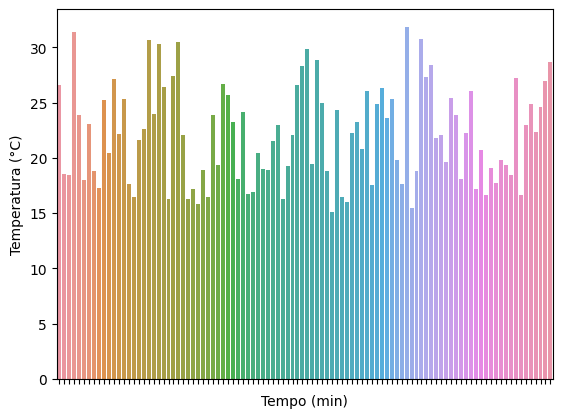

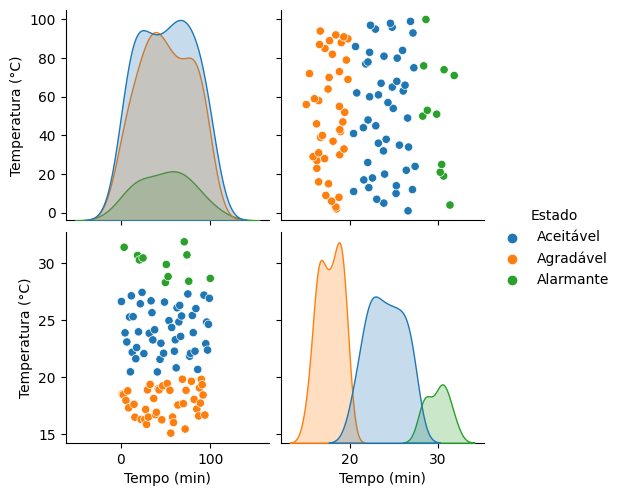

In [16]:
import seaborn as sns


# Gráfico de Barras
a = sns.barplot(x = "Tempo", y = "Temperatura", data = df)
a.set_xticklabels([])
a.set(xlabel = "Tempo (min)", ylabel = "Temperatura (°C)")

#Pair PLot
b = sns.pairplot(df, hue='Estado')
b.set(xlabel = "Tempo (min)", ylabel = "Temperatura (°C)")

